In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1 : Dataset

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [9]:
# Reshape to include channel dimension

X_train_reshaped = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test_reshaped = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print("Train shape:", X_train_reshaped.shape)
print("Test shape:", X_test_reshaped.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


Reshape → (28, 28, 1)

CNN layers expect input in the form:
(batch_size, height, width, channels)


For grayscale images: channels = 1
For RGB images: channels = 3
So (28,28,1) explicitly tells the model:
"Each image has height 28, width 28, and 1 channel (grayscale)."

In [10]:
# Step 2 : Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [11]:
# Step 3 : Compile

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
# Step 4 : Train

history = model.fit(X_train_reshaped, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1311 - accuracy: 0.9592 - val_loss: 5.8949 - val_accuracy: 0.9864
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 6.8530 - val_accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 7.9552 - val_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 9.0938 - val_accuracy: 0.9866
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 16.2877 - val_accuracy: 0.9787


In [13]:
# Step 5 : Evaluate

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

313/313 - 3s - loss: 16.2877 - accuracy: 0.9787 - 3s/epoch - 9ms/step
Test accuracy:  0.9786999821662903


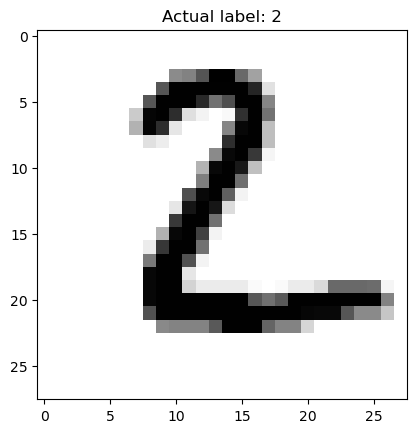

313/313 [==============================] - 3s 9ms/step
Predicted Label: 2


In [25]:
# Step 6 : Predict Example

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(X_test[1], cmap='binary')
plt.title("Actual label: {}".format(y_test[1]))
plt.show()

prediction = model.predict(X_test)
print("Predicted Label:", np.argmax(prediction[1]))

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in prediction])

Text(95.72222222222221, 0.5, 'Actual')

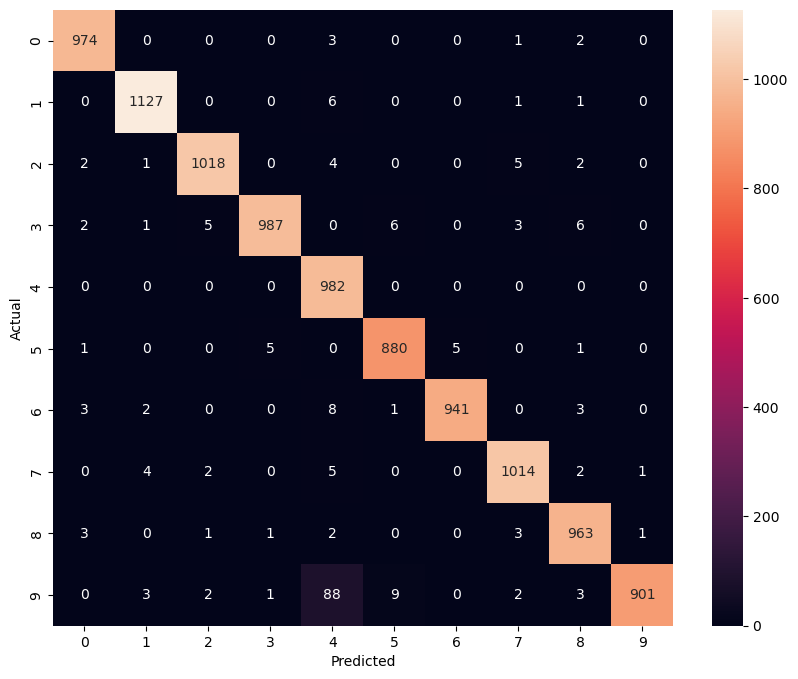

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")